In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.zeros((20, 40))
A[:,:20] = np.eye(20)
A[:,20:] = -np.eye(20)

def H(x):
  d = np.zeros(40)
  for i in range(40):
    d[i] = 1 / (1 - np.dot(A[:,i], x))
  D = np.diag(d)
  return A @ D @ A.T

def G(x):
  d = np.zeros(40)
  for i in range(40):
    d[i] = 1 / (1 - np.dot(A[:,i], x))
  return A @ d

In [4]:
m = 20
x = np.zeros(m)
c = np.ones(m)
t = 0.1
k = 0
eps = 0.01
gamma = 1
lam = 0
eps_k = 0
losses = []

while True:
 print(np.dot(c,x), eps_k)
 losses.append(np.dot(c,x))
 k += 1
 t *= (1 + 1/(20 * np.sqrt(m)))
 x -= 1/(1 + eps_k) * np.linalg.inv(H(x)) @ (t * c + G(x)) 
 lam = np.sqrt((t * c + G(x)).T @ H(x) @ (t * c + G(x)))
 eps_k = (lam ** 2) / (1 + lam)
 if t > m/eps:
   break

print("Final: ", np.dot(c, x))


0.0 0
-1.011180339887499 2.6886502274718077e-06
-1.019871963992898 8.200277726563435e-10
-1.0312288730823003 1.461698264189769e-09
-1.0426974785935492 1.5584955718778016e-09
-1.0542923289702064 1.6655461881410004e-09
-1.0660146965242188 1.7799169091655062e-09
-1.0778659363925498 1.902128857539999e-09
-1.0898474161240708 2.032718340013894e-09
-1.1019605161256083 2.172258363227726e-09
-1.1142066297239104 2.3213610066660234e-09
-1.1265871632279643 2.480680079888554e-09
-1.1391035359893387 2.650913954840374e-09
-1.1517571804605158 2.832808590252286e-09
-1.164549542251105 3.0271607593780576e-09
-1.1774820801818358 3.2348214982882852e-09
-1.1905562663361744 3.456699782577194e-09
-1.203773586109521 3.693766454676148e-09
-1.2171355382558084 3.947058414863912e-09
-1.2306436349314138 4.217683093393881e-09
-1.2442994017362519 4.50682322530187e-09
-1.2581043777519045 4.8157419447145446e-09
-1.2720601155766815 5.145788222609575e-09
-1.2861681813574328 5.498402667233947e-09
-1.3004301548180393 5.875

Text(0.5, 1.0, 'Convergence of Central Path Following')

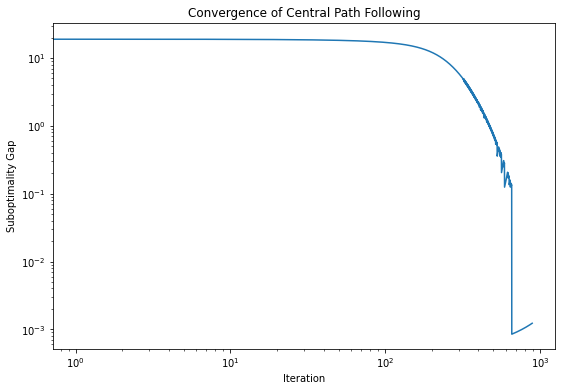

In [6]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.arange(len(losses)), np.array(losses) - (-20))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Suboptimality Gap')
ax.set_xlabel('Iteration')
ax.set_title('Convergence of Central Path Following')